In [836]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('/kaggle/input/noshowappointments/KaggleV2-May-2016.csv')

#show the columns
#df.columns

#predictors
y = df['No-show']

#features: Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received
patient_features = ['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
X = df[patient_features]
#patientID, appointmentID, ScheduledDay, AppointmentDay and Neighborhood are just identifications so we drop it
df.drop(['PatientId','AppointmentID',
         'ScheduledDay','AppointmentDay','Neighbourhood'], axis=1, inplace = True)
# X.describe()
# X.head()

#Examining statistics summary:
#min age is -1. max age is 115 (outlier). majority is aged 18-55
#drop age -1 because it's not sensible
df=df.loc[(df.Age != -1)]
#Most people are not on scholarship, are not diabetic or hypertensive, and did not receive SMS.
df.describe()
#df.info()
#There is no missing value
df.isnull().any()

/kaggle/input/noshowappointments/KaggleV2-May-2016.csv


Gender          False
Age             False
Scholarship     False
Hipertension    False
Diabetes        False
Alcoholism      False
Handcap         False
SMS_received    False
No-show         False
dtype: bool

No-show by gender:

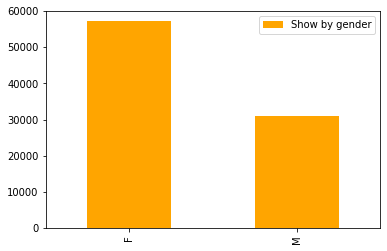

In [837]:
#Distribution of variables
#NoShow from "Yes" and "No" to "1" and "0"
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})
#Making variable for show and noshow
show = df['No-show'] == False
no_show = df['No-show'] == True 
plt_gender = df.Gender[show].value_counts().plot(kind='bar', color= 'orange', label='Show by gender')
plt_gender.legend()

No-show by scholarship:

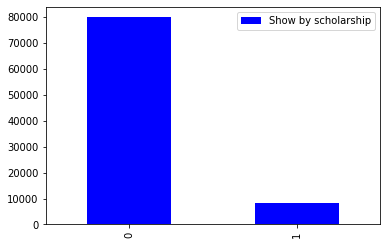

In [838]:
plt_scholarship = df.Scholarship[show].value_counts().plot(kind='bar', color= 'blue', label='Show by scholarship')
plt_scholarship.legend()

No-show by age:

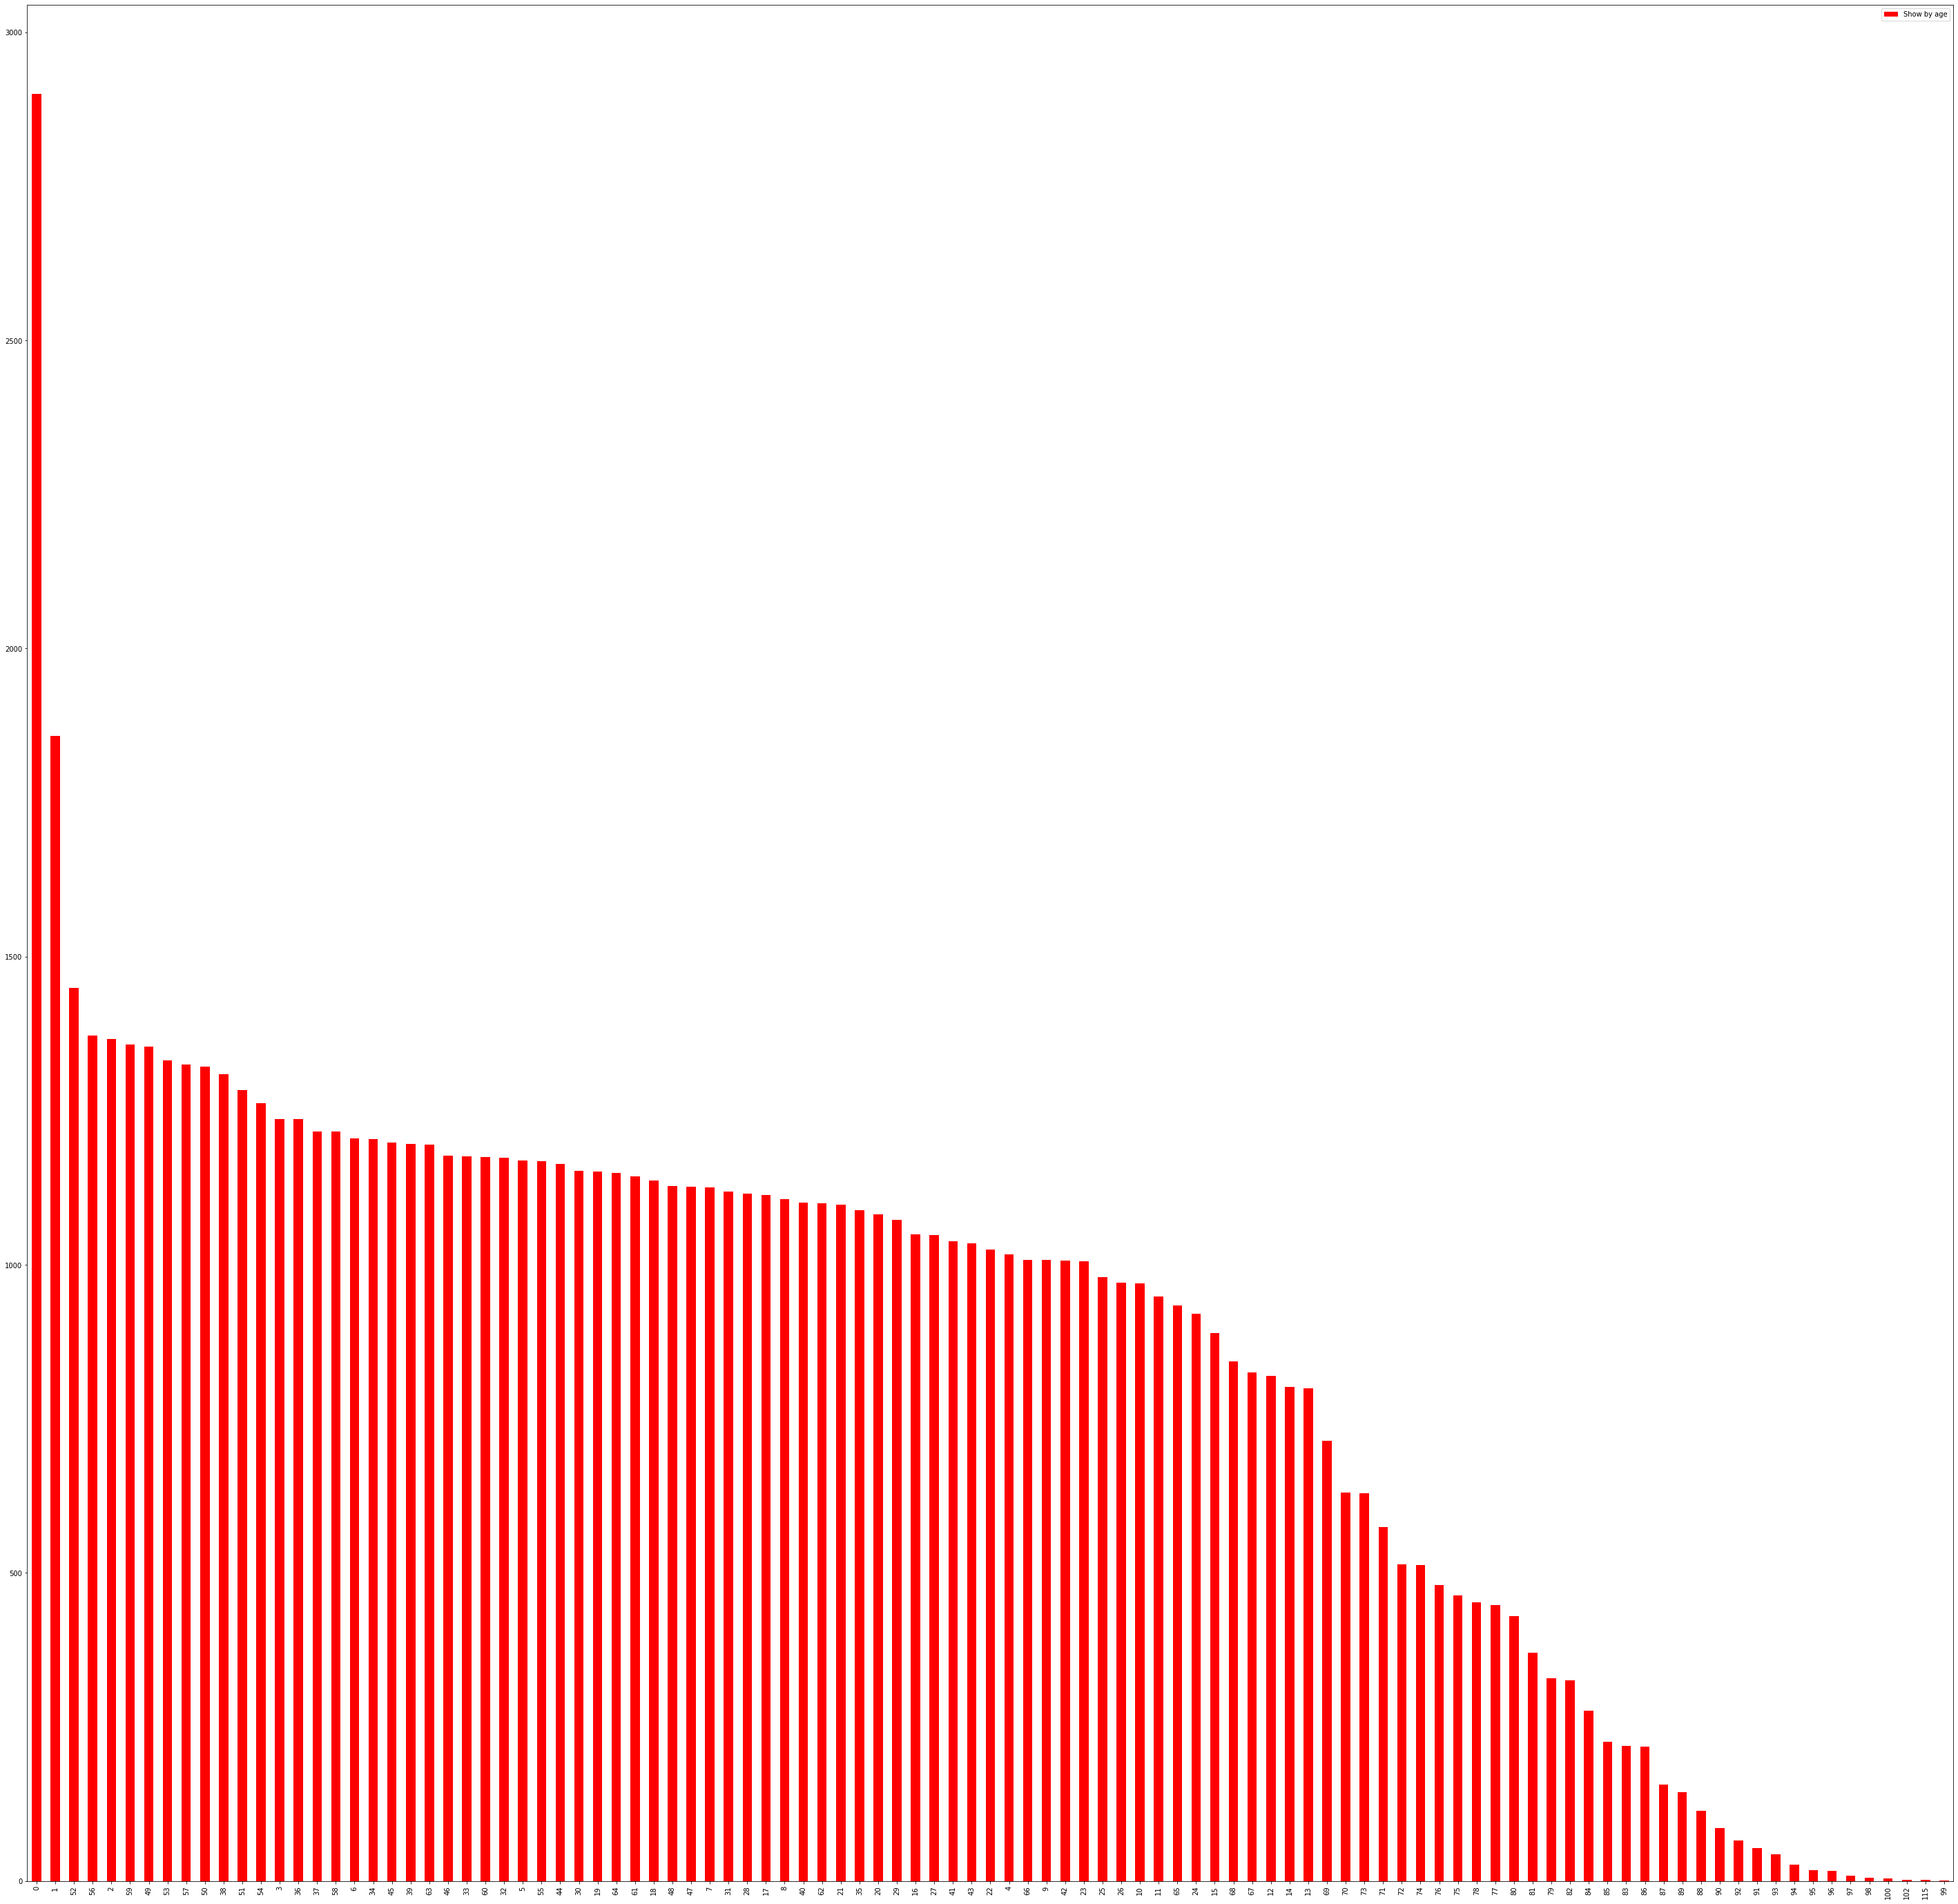

In [839]:
plt_age = df.Age[show].value_counts().plot(kind='bar', color= 'red', figsize = (50,50),label='Show by age')
plt_age.legend()

No-show by hypertension:

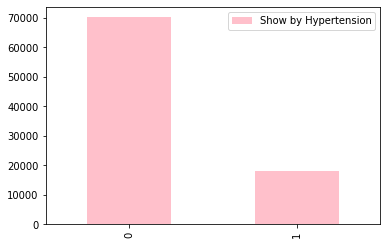

In [840]:
plt_hyper = df.Hipertension[show].value_counts().plot(kind='bar', color= 'pink', label='Show by Hypertension')
plt_hyper.legend()

Plotting a graph for no-show by diabetes: 

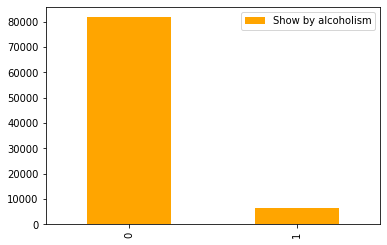

In [841]:
plt_dia = df.Diabetes[show].value_counts().plot(kind='bar', color= 'orange', label='Show by alcoholism')
plt_dia.legend()

No-show by Alcoholism:

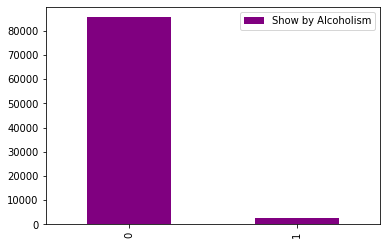

In [842]:
plt_ac = df.Alcoholism[show].value_counts().plot(kind='bar', color= 'purple', label='Show by Alcoholism')
plt_ac.legend()

No-show by handicap:

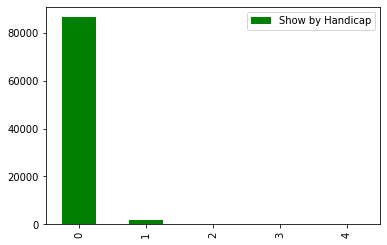

In [843]:
plt_hand = df.Handcap[show].value_counts().plot(kind='bar', color= 'green', label='Show by Handicap')
plt_hand.legend()

No-show based on SMS messaged received:

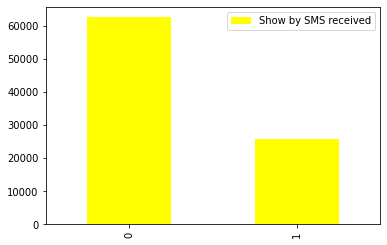

In [844]:
plt_sms = df['SMS_received'][show].value_counts().plot(kind='bar', color= 'yellow', label='Show by SMS received')
plt_sms.legend()

**Based on the observations above:**
-There are more showups than no-shows.
-Patients who have Hypertension,Diabetes, Alcoholism and Handicap are more likely to show up.

Now, starting to build the prediction model (ie. decision tree)

In [845]:
#check the data types
df.dtypes
#check the columns
df.columns
#check X
X.describe()
#check y
y.describe()

count     110527
unique         2
top           No
freq       88208
Name: No-show, dtype: object

In [846]:
#create dummies 
X_train1 = pd.get_dummies(X)

In [847]:
#scaling to make numerical var
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train1)
rescaledX = scaler.transform(X_train1)

In [848]:
from sklearn.metrics import classification_report 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Create Training and Test Dataset with 75% Training and 25% Test
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, test_size=0.25, random_state = 42)
dst = tree.DecisionTreeClassifier(max_depth = 10, random_state = 1)
dst.fit(X_train, y_train)
prediction = dst.predict(X_test)

#check accuracy
accdst = dst.score(X_train, y_train)
acctst = dst.score(X_test, y_test)
print("Accuracy on the training data: ", accdst)
print("Accuracy on the testing data: ", acctst)
#confusion matrix
confusion = confusion_matrix(y_test, prediction)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
#precision score = TP / (FP+TP)
#Recall Score = TP / (FN + TP)

Accuracy on the training data:  0.7992761927739912
Accuracy on the testing data:  0.7988563983786914


**Report metrics for model: Precision, Recall, F-Score, AUC**

In [849]:
report = classification_report(y_test, prediction,zero_division = 1)
print(report)

              precision    recall  f1-score   support

          No       0.80      1.00      0.89     22099
         Yes       0.38      0.01      0.01      5533

    accuracy                           0.80     27632
   macro avg       0.59      0.50      0.45     27632
weighted avg       0.72      0.80      0.71     27632



**Plot the ROC curve **

AUC Score:  0.5942944695569902


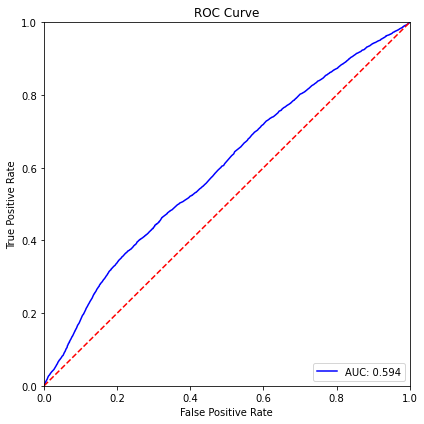

In [855]:
import matplotlib.pyplot as plt
from sklearn import metrics, model_selection, datasets, svm
from sklearn.metrics import roc_curve, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

#Apply Logistic Regression Model 
model = LogisticRegression(random_state=100, solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)
predicted_test = model.predict(X_test)

logRegAUC = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print("AUC Score: ", logRegAUC)

clf = LogisticRegression(class_weight="balanced")

clf_grid = GridSearchCV(estimator=clf,
                        param_grid={
                            "C": np.logspace(-3, 2, num=20),
                        },
                        cv=KFold(n_splits=5, shuffle=True),
                        scoring='roc_auc',
                        n_jobs=-1,
                        refit=True
)
clf_grid.fit(X_train, y_train)
clf = clf_grid.best_estimator_
plt.figure(figsize=(6,6))
y_test = y_test.map({'Yes': 1, 'No': 0})
fpr, tpr, thresh = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label="AUC: {:.3f}".format(roc_auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

**What are the inductive biases of a Decision Tree, explain your answer with reference to the model above **

The inductive bias are the assumptions one makes about the algorithm. In the Decision Tree, if the depth of the tree is too much, there is not enough generalisation and while testing the model on a new example, we might reach a particular example used to train the model. The framwork of induction that the Decision Tree has is that when we are given training data on which our algorithm is expected to learn (ie. observed or historical data), the learning algorithm induces a function that will map a new example to a corresponding prediction. We evaluate the algorithm based on the test set.
In the model above, we are given variables that can affect a patient's likelihood to show up at their appointment. From observation, we selected the variables that may be related to the target we are looking for by using our assumptions. From such variables, we let the algorithm induce a function that can make the predictions. We then test the predictions on the test set. The accuracy is around 80%. The inductive biases in the model above are 'Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', and 'SMS_received'. Obviously, there are limitations since the dataset only covers a short period of time and doesn't include more information that can help with better predictions such as the patient employment status or the patient's means of transportation. 